In [15]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib

In [16]:
matplotlib.rcParams.update({
    'text.usetex': True,
    'font.family': 'sans-serif',
    'text.latex.preamble': r'\usepackage{sourcesanspro,eulervm}',
    'font.size' : 11,
    'pgf.rcfonts': False,
})

In [17]:
import pandas as pd

In [18]:
# helper function to set box plot color 
def set_box_color(bp, color, ls):
    plt.setp(bp['boxes'], color='black', ls=ls, lw=1.0)
    plt.setp(bp['whiskers'], color='black', lw=1.0)
    plt.setp(bp['caps'], color='black', lw=1.0)
    plt.setp(bp['medians'], color='black', lw=1.0)
    for patch, c in zip(bp['boxes'], [color for i in range(0, len(bp['boxes']))]):
        patch.set_facecolor(c)

# get individual load sheds for the box plot given the filename 
def get_bp_load_sheds(filename):
    path = '../../dc-opf-ls/' 
    file = path + filename 
    data = pd.read_csv(file) 
    ls = [data[str(i+1)].tolist() for i in range(0, 11)]
    return ls

def get_data(filename): 
    path = '../../dc-opf-ls/' 
    file = path + filename 
    return pd.read_csv(file)

# calculate Gini Index 
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x) * (len(x) - 1) * np.mean(x))

# calcualte Jain Index
def jain(x): 
    return np.sum(x)**2 / (len(x) * np.sum(np.square(x)))

# get individual Gini Index values across scenarios 
def get_GI(filename):
    data = get_data(filename) 
    data['gini'] = data.apply(lambda x: gini([x[str(i)] for i in range(1, 12)]), axis=1)
    return data['gini'].tolist() 

# get individual Jain Index values across scenarios 
def get_JI(filename): 
    data = get_data(filename)
    data['jain'] = data.apply(lambda x: jain([x[str(i)] for i in range(1, 12)]), axis=1)
    return data['jain'].tolist()

MLS GI - mean 0.86, max 1.00, min 0.43
W-MLS GI - mean 0.85, max 1.00, min 0.43
MLS JI - mean 0.23, max 0.65, min 0.09
W-MLS JI - mean 0.24, max 0.65, min 0.09


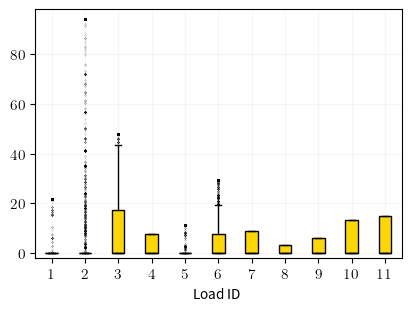

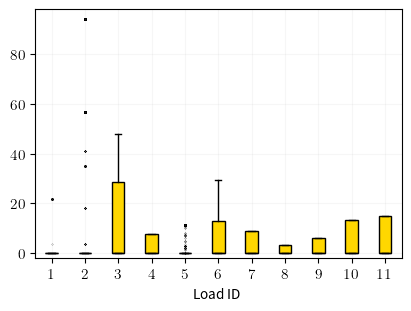

In [19]:
# why weights do not help 
labels = [r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$', r'$7$', r'$8$', r'$9$', r'$10$', r'$11$']
ticks = list(np.linspace(1, 5, 11))
fig, ax = plt.subplots(1,1,constrained_layout=True)

bplot = ax.boxplot(get_bp_load_sheds('dc-opf-ls-MinSum.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.3, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_xticks(ticks)
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_xlim([0.8, 5.2])
ax.set_ylim([-2, 98])
set_box_color(bplot, 'gold', '-')
ax.grid(alpha=0.1)
ax.set_xlabel('Load ID')
# ax.set_title('MLS')
fig.set_size_inches(4, 3)
plt.savefig('unweighted.pdf', format='pdf')

fig, ax = plt.subplots(1,1,constrained_layout=True)
bplot = ax.boxplot(get_bp_load_sheds('dc-opf-ls-MinSum-w.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.3, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_xticks(ticks)
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_xlim([0.8, 5.2])
ax.set_ylim([-2, 98])
set_box_color(bplot, 'gold', '-')
ax.grid(alpha=0.1)
ax.set_xlabel('Load ID')
# ax.set_title('Weighted MLS')

fig.set_size_inches(4, 3)
plt.savefig('weighted.pdf', format='pdf')

mls_GI = get_GI('dc-opf-ls-MinSum.csv')
wmls_GI = get_GI('dc-opf-ls-MinSum-w.csv')
mls_JI = get_JI('dc-opf-ls-MinSum.csv')
wmls_JI = get_JI('dc-opf-ls-MinSum-w.csv')
print('MLS GI - mean {:.2f}, max {:.2f}, min {:.2f}'.format(np.mean(mls_GI), np.max(mls_GI), np.min(mls_GI)))
print('W-MLS GI - mean {:.2f}, max {:.2f}, min {:.2f}'.format(np.mean(wmls_GI), np.max(wmls_GI), np.min(wmls_GI)))
print('MLS JI - mean {:.2f}, max {:.2f}, min {:.2f}'.format(np.mean(mls_JI), np.max(mls_JI), np.min(mls_JI)))
print('W-MLS JI - mean {:.2f}, max {:.2f}, min {:.2f}'.format(np.mean(wmls_JI), np.max(wmls_JI), np.min(wmls_JI)))

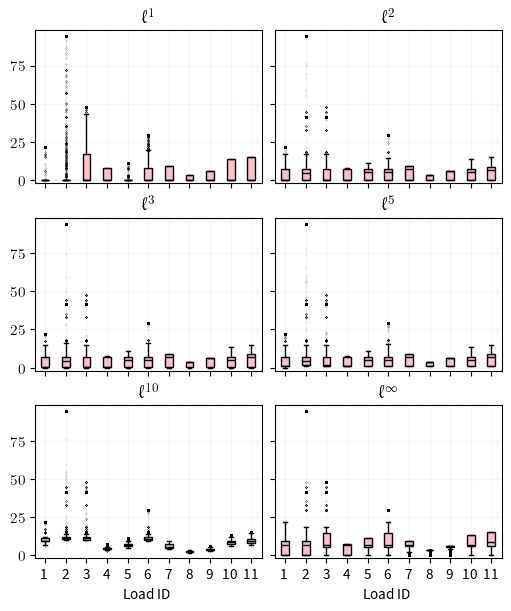

In [20]:
# Plot load shed spreads for the norm objective functions
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ticks = list(np.linspace(1, 5, 11))
fig, ax = plt.subplots(3,2,constrained_layout=True)

bplot = ax[0, 0].boxplot(get_bp_load_sheds('dc-opf-ls-MinSum.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[0, 0].set_xticklabels([])
ax[0, 0].set_xticks(ticks)
ax[0, 0].set_xlim([0.8, 5.2])
ax[0, 0].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[0, 0].grid(alpha=0.1)
# ax[0, 0].set_ylabel('MW')
ax[0, 0].set_title(r'$\ell^1$')

bplot = ax[0, 1].boxplot(get_bp_load_sheds('dc-opf-ls-pNorm-2.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[0, 1].set_xticklabels([])
ax[0, 1].set_yticklabels([])
ax[0, 1].set_xticks(ticks)
ax[0, 1].set_xlim([0.8, 5.2])
ax[0, 1].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[0, 1].grid(alpha=0.1)
ax[0, 1].set_title(r'$\ell^2$')

bplot = ax[1, 0].boxplot(get_bp_load_sheds('dc-opf-ls-pNorm-3.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[1, 0].set_xticklabels([])
ax[1, 0].set_xticks(ticks)
ax[1, 0].set_xlim([0.8, 5.2])
ax[1, 0].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[1, 0].grid(alpha=0.1)
# ax[1, 0].set_ylabel('MW')
ax[1, 0].set_title(r'$\ell^3$')

bplot = ax[1, 1].boxplot(get_bp_load_sheds('dc-opf-ls-pNorm-5.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[1, 1].set_xticklabels([])
ax[1, 1].set_yticklabels([])
ax[1, 1].set_xticks(ticks)
ax[1, 1].set_xlim([0.8, 5.2])
ax[1, 1].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[1, 1].grid(alpha=0.1)
ax[1, 1].set_title(r'$\ell^5$')

bplot = ax[2, 0].boxplot(get_bp_load_sheds('dc-opf-ls-pNorm-10.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[2, 0].set_xticklabels(labels)
ax[2, 0].set_xticks(ticks)
ax[2, 0].set_xlim([0.8, 5.2])
ax[2, 0].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[2, 0].grid(alpha=0.1)
# ax[2, 0].set_ylabel('MW')
ax[2, 0].set_xlabel('Load ID')
ax[2, 0].set_title(r'$\ell^{10}$')

bplot = ax[2, 1].boxplot(get_bp_load_sheds('dc-opf-ls-MinMax.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[2, 1].set_xticklabels(labels)
ax[2, 1].set_yticklabels([])
ax[2, 1].set_xticks(ticks)
ax[2, 1].set_xlim([0.8, 5.2])
ax[2, 1].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[2, 1].grid(alpha=0.1)
ax[2, 1].set_xlabel('Load ID')
ax[2, 1].set_title(r'$\ell^{\infty}$')

fig.set_size_inches(5, 6)
plt.savefig('norms-unweighted.pdf', format='pdf')



In [21]:
# Get Gini and Jain Indexes for norm objective functions 
norm_filenames = ['dc-opf-ls-MinSum.csv', 
             'dc-opf-ls-pNorm-2.csv', 
             'dc-opf-ls-pNorm-3.csv', 
             'dc-opf-ls-pNorm-5.csv', 
             'dc-opf-ls-pNorm-10.csv', 
             'dc-opf-ls-MinMax.csv']

norm_GI = [get_GI(f) for f in norm_filenames]
norm_JI = [get_JI(f) for f in norm_filenames]

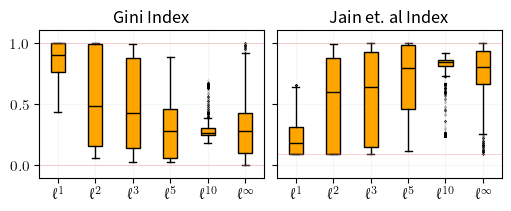

In [22]:
# Plot Gini and Jain Indexes for the norm objective functions 
labels = [r'$\ell^{1}$', r'$\ell^{2}$', r'$\ell^{3}$', r'$\ell^{5}$', r'$\ell^{10}$', r'$\ell^{\infty}$']
ticks = list(np.linspace(1, 3, 6))
fig, (ax1, ax2) = plt.subplots(1,2,constrained_layout=True)

bplot = ax1.boxplot(norm_GI, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax1.set_xticklabels(labels)
ax1.set_xticks(ticks)
ax1.set_xlim([0.8, 3.2])
ax1.set_ylim([-0.1, 1.1])
set_box_color(bplot, 'orange', '-')
ax1.axhline(y=0, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax1.axhline(y=1, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax1.grid(alpha=0.1)
ax1.set_title('Gini Index')

bplot = ax2.boxplot(norm_JI, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax2.set_xticklabels(labels)
ax2.set_xticks(ticks)
ax2.set_yticklabels([])
ax2.set_xlim([0.8, 3.2])
ax2.set_ylim([-0.1, 1.1])
set_box_color(bplot, 'orange', '-')
ax2.axhline(y=1/11.0, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax2.axhline(y=1, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax2.grid(alpha=0.1)
ax2.set_title('Jain et. al Index')

fig.set_size_inches(5, 2)
plt.savefig('norms-indexes.pdf', format='pdf')

failure in monotonicity count: 7087
monotonicity holds count: 2678
pof2 - max: 7.07
pof3 - max: 101.84
pof5 - max: 1420.98
pof10 - max: 7280.17
pofinf - max: 10.0


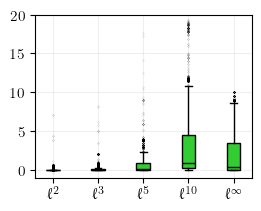

In [23]:
# Price of fairness for norm objective functions 
base_case = 'dc-opf-ls-MinSum.csv' 
p_norm_cases = [('l2', 'pof2', 'dc-opf-ls-pNorm-2.csv'),
             ('l3', 'pof3','dc-opf-ls-pNorm-3.csv'), 
             ('l5', 'pof5','dc-opf-ls-pNorm-5.csv'), 
             ('l10', 'pof10','dc-opf-ls-pNorm-10.csv'), 
             ('linf', 'pofinf','dc-opf-ls-MinMax.csv')]

df = get_data(base_case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': 'l1'})
for (l, pof, case) in p_norm_cases: 
    data = get_data(case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': l}) 
    df = df.join(data.set_index('scenario_id'), on='scenario_id')
    df[pof] = (df[l] - df['l1'])/df['l1']
    df[pof] = df[pof].round(2)

df['is_monotonic'] = (
   ~df.filter(like='pof').cummax(axis=1)
      .sub(df).gt(0).any(axis=1)
)

bp_data = [df[pof].tolist() for (l, pof, f) in p_norm_cases]

print('failure in monotonicity count: {}'.format(df['is_monotonic'].value_counts()[False]))
print('monotonicity holds count: {}'.format(df['is_monotonic'].value_counts()[True]))

labels = [r'$\ell^{2}$', r'$\ell^{3}$', r'$\ell^{5}$', r'$\ell^{10}$', r'$\ell^{\infty}$']
ticks = list(np.linspace(1, 3, 5))
fig, ax = plt.subplots(constrained_layout=True)

bplot = ax.boxplot(bp_data, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_xticks(ticks)
ax.set_xlim([0.8, 3.2])
ax.set_ylim([-1, 20])
set_box_color(bplot, 'limegreen', '-')
ax.grid(alpha=0.2)

fig.set_size_inches(2.5, 2)
plt.savefig('norms-pof.pdf', format='pdf')

for (l, pof, f) in p_norm_cases:
    print('{} - max: {}'.format(pof, max(df[pof])))

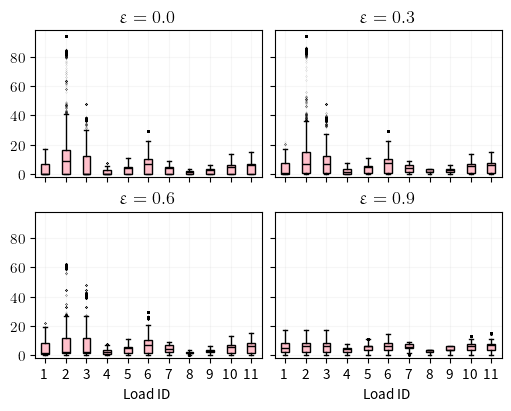

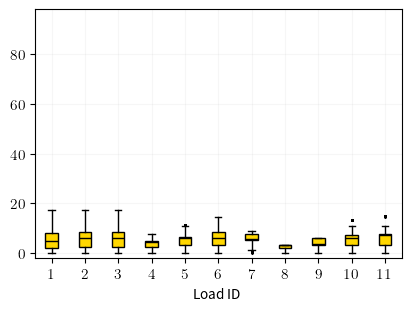

In [24]:
# Plot load shed spreads for the constraint fairness
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ticks = list(np.linspace(1, 5, 11))
fig, ax1 = plt.subplots(2, 2,constrained_layout=True)

ax = [ax1[0, 0], ax1[0, 1], ax1[1, 0], ax1[1, 1]]

bplot = ax[0].boxplot(get_bp_load_sheds('dc-ls-cons-0.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[0].set_xticklabels([])
ax[0].set_xticks(ticks)
ax[0].set_yticks([0, 20, 40, 60, 80])
ax[0].set_xlim([0.8, 5.2])
ax[0].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[0].grid(alpha=0.1)
ax[0].set_title(r'$\varepsilon=0.0$')


bplot = ax[1].boxplot(get_bp_load_sheds('dc-ls-cons-30.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_yticks([0, 20, 40, 60, 80])
ax[1].set_xticks(ticks)
ax[1].set_xlim([0.8, 5.2])
ax[1].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[1].grid(alpha=0.1)
ax[1].set_title(r'$\varepsilon=0.3$')


bplot = ax[2].boxplot(get_bp_load_sheds('dc-ls-cons-60.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[2].set_xticklabels(labels)
ax[2].set_yticks([0, 20, 40, 60, 80])
ax[2].set_xticks(ticks)
ax[2].set_xlim([0.8, 5.2])
ax[2].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[2].grid(alpha=0.1)
ax[2].set_xlabel('Load ID')
ax[2].set_title(r'$\varepsilon=0.6$')

bplot = ax[3].boxplot(get_bp_load_sheds('dc-ls-cons-90.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[3].set_xticklabels(labels)
ax[3].set_yticklabels([])
ax[3].set_yticks([0, 20, 40, 60, 80])
ax[3].set_xticks(ticks)
ax[3].set_xlim([0.8, 5.2])
ax[3].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[3].grid(alpha=0.1)
ax[3].set_xlabel('Load ID')
ax[3].set_title(r'$\varepsilon=0.9$')

fig.set_size_inches(5, 4)
plt.savefig('cons-unweighted.pdf', format='pdf')

labels = [r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$6$', r'$7$', r'$8$', r'$9$', r'$10$', r'$11$']
fig, ax = plt.subplots(1, 1,constrained_layout=True)

bplot = ax.boxplot(get_bp_load_sheds('dc-ls-cons-90.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_xticks(ticks)
ax.set_xlim([0.8, 5.2])
ax.set_ylim([-2, 98])
set_box_color(bplot, 'gold', '-')
ax.grid(alpha=0.1)
ax.set_xlabel('Load ID')
# ax.set_title(r'$\varepsilon=0.9$')

fig.set_size_inches(4, 3)
plt.savefig('cons-eps9.pdf', format='pdf')


In [25]:
# Get Gini and Jain Indexes for constraint fairness 
cons_filenames = ['dc-ls-cons-0.csv', 
                 'dc-ls-cons-10.csv', 
                 'dc-ls-cons-20.csv', 
                 'dc-ls-cons-30.csv', 
                 'dc-ls-cons-40.csv', 
                 'dc-ls-cons-50.csv',
                 'dc-ls-cons-60.csv',
                 'dc-ls-cons-70.csv',
                 'dc-ls-cons-80.csv',
                 'dc-ls-cons-90.csv',]

cons_GI = [get_GI(f) for f in cons_filenames]
cons_JI = [get_JI(f) for f in cons_filenames]

EPS9 GI - mean 0.18, max 0.25, min 0.12
EPS9 JI - mean 0.88, max 0.95, min 0.86


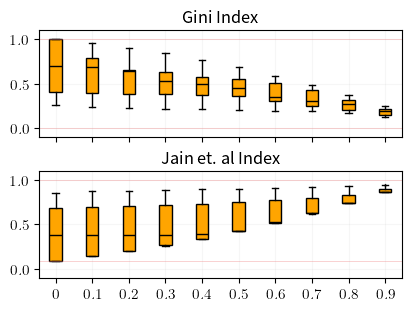

In [26]:
# Plot Gini and Jain Indexes for the constraint fairness 
labels = [r'$0$', r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$', r'$0.5$', r'$0.6$', r'$0.7$', r'$0.8$', r'$0.9$']
ticks = list(np.linspace(1, 5, 10))
fig, (ax1, ax2) = plt.subplots(2,1,constrained_layout=True)

bplot = ax1.boxplot(cons_GI, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax1.set_xticklabels([])
ax1.set_xticks(ticks)
ax1.set_xlim([0.8, 5.2])
ax1.set_ylim([-0.1, 1.1])
set_box_color(bplot, 'orange', '-')
ax1.axhline(y=0, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax1.axhline(y=1, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax1.grid(alpha=0.1)
ax1.set_title('Gini Index')

bplot = ax2.boxplot(cons_JI, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax2.set_xticklabels(labels)
ax2.set_xticks(ticks)
ax2.set_xlim([0.8, 5.2])
ax2.set_ylim([-0.1, 1.1])
set_box_color(bplot, 'orange', '-')
ax2.axhline(y=1/11.0, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax2.axhline(y=1, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax2.grid(alpha=0.1)
ax2.set_title('Jain et. al Index')

fig.set_size_inches(4, 3)
plt.savefig('cons-indexes.pdf', format='pdf')

cons_GI_eps9 = get_GI('dc-ls-cons-90.csv')
cons_JI_eps9 = get_JI('dc-ls-cons-90.csv')
print('EPS9 GI - mean {:.2f}, max {:.2f}, min {:.2f}'.format(np.mean(cons_GI_eps9), np.max(cons_GI_eps9), np.min(cons_GI_eps9)))
print('EPS9 JI - mean {:.2f}, max {:.2f}, min {:.2f}'.format(np.mean(cons_JI_eps9), np.max(cons_JI_eps9), np.min(cons_JI_eps9)))

monotonicity holds count: 9765
pof10 - max: 0.24
pof20 - max: 0.48
pof30 - max: 0.74
pof40 - max: 1.04
pof50 - max: 1.42
pof60 - max: 1.75
pof70 - max: 2.34
pof80 - max: 2.98
pof90 - max: 4.02


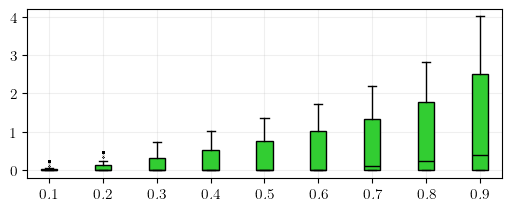

In [12]:
# Price of fairness for constraint fairness
base_case = 'dc-ls-cons-0.csv' 
cons_cases = [('e10', 'pof10', 'dc-ls-cons-10.csv'), 
              ('e20', 'pof20', 'dc-ls-cons-20.csv'),
              ('e30', 'pof30', 'dc-ls-cons-30.csv'),
              ('e40', 'pof40', 'dc-ls-cons-40.csv'),
              ('e50', 'pof50', 'dc-ls-cons-50.csv'),
              ('e60', 'pof60', 'dc-ls-cons-60.csv'),
              ('e70', 'pof70', 'dc-ls-cons-70.csv'),
              ('e80', 'pof80', 'dc-ls-cons-80.csv'),
              ('e90', 'pof90', 'dc-ls-cons-90.csv')]


cons_df = get_data(base_case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': 'e0'})
for (l, pof, case) in cons_cases: 
    data = get_data(case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': l}) 
    cons_df = cons_df.join(data.set_index('scenario_id'), on='scenario_id')
    cons_df[pof] = (cons_df[l] - cons_df['e0'])/cons_df['e0']
    cons_df[pof] = cons_df[pof].round(2)

cons_df['is_monotonic'] = (
   ~cons_df.filter(like='pof').cummax(axis=1)
      .sub(cons_df).gt(0).any(axis=1)
)


c_df = cons_df.dropna()
bp_data = [c_df[pof].dropna().tolist() for (l, pof, f) in cons_cases]

print('monotonicity holds count: {}'.format(cons_df['is_monotonic'].value_counts()[True]))

labels = [r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$', r'$0.5$', r'$0.6$', r'$0.7$', r'$0.8$', r'$0.9$']
ticks = list(np.linspace(1, 5, 9))
fig, ax = plt.subplots(constrained_layout=True)

bplot = ax.boxplot(bp_data, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_xticks(ticks)
ax.set_xlim([0.8, 5.2])
ax.set_ylim([-0.2, 4.2])
# ax.set_xlabel(r'$\varepsilon$')
set_box_color(bplot, 'limegreen', '-')
ax.grid(alpha=0.2)

fig.set_size_inches(5, 2)
plt.savefig('cons-pof.pdf', format='pdf')

for (l, pof, f) in cons_cases:
    print('{} - max: {}'.format(pof, max(cons_df[pof])))

In [30]:
# Calculate \varepsilon max (See proposition in the paper) 
base_case = 'dc-ls-cons-0.csv' 
c_cases = [('e10', 'dc-ls-cons-10.csv'), 
           ('e15', 'dc-ls-cons-15.csv'), 
           ('e20', 'dc-ls-cons-20.csv'),
           ('e25', 'dc-ls-cons-25.csv'), 
           ('e30', 'dc-ls-cons-30.csv'),
           ('e35', 'dc-ls-cons-35.csv'), 
           ('e40', 'dc-ls-cons-40.csv'),
           ('e45', 'dc-ls-cons-45.csv'), 
           ('e50', 'dc-ls-cons-50.csv'),
           ('e55', 'dc-ls-cons-55.csv'), 
           ('e60', 'dc-ls-cons-60.csv'),
           ('e65', 'dc-ls-cons-65.csv'), 
           ('e70', 'dc-ls-cons-70.csv'),
           ('e75', 'dc-ls-cons-75.csv'), 
           ('e80', 'dc-ls-cons-80.csv'),
           ('e85', 'dc-ls-cons-85.csv'), 
           ('e90', 'dc-ls-cons-90.csv'),
           ('e95', 'dc-ls-cons-95.csv'), 
           ('e100', 'dc-ls-cons-100.csv')]

bin_count = []
c_df = get_data(base_case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': 'e0'})
total = c_df['scenario_id'].count()
for i, (l, case) in enumerate(c_cases): 
    data = get_data(case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': l}) 
    c_df = c_df.join(data.set_index('scenario_id'), on='scenario_id')
    bin_count.append(total - c_df[l].dropna().count())

epsilon = list(range(10, 105, 5))
updated_count = [0]
for i in range(1, len(bin_count)):
    updated_count.append(bin_count[i]-bin_count[i-1])

updated_eps = [] 
for i in epsilon:
    updated_eps.append((i-5)/100.0)

# $\varepsilon^{\max}$ lower bound' printing
print('bound,num-instances')
for (eps, n) in zip(updated_eps, updated_count): 
    print('{},{}'.format(eps, n))

print('total all feasible instance count: {}'.format(total-sum(updated_count)))
print(bin_count)

bound,num-instances
0.05,0
0.1,0
0.15,0
0.2,0
0.25,0
0.3,0
0.35,0
0.4,0
0.45,0
0.5,813
0.55,0
0.6,0
0.65,0
0.7,603
0.75,27
0.8,229
0.85,43
0.9,1431
0.95,5985
total all feasible instance count: 634
[0, 0, 0, 0, 0, 0, 0, 0, 0, 813, 813, 813, 813, 1416, 1443, 1672, 1715, 3146, 9131]


monotonicity holds count: 9765
pof10 - max: 0.24
pof20 - max: 0.48
pof30 - max: 0.74
pof40 - max: 1.04
pof50 - max: 1.42
pof60 - max: 1.75
pof70 - max: 2.34
pof80 - max: 2.98
pof90 - max: 4.02
pof100 - max: 9.99


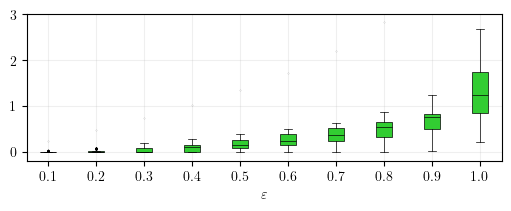

In [31]:
# Price of fairness for constraint fairness with eps = 1.0
base_case = 'dc-ls-cons-0.csv' 
cons_cases = [('e10', 'pof10', 'dc-ls-cons-10.csv'), 
              ('e20', 'pof20', 'dc-ls-cons-20.csv'),
              ('e30', 'pof30', 'dc-ls-cons-30.csv'),
              ('e40', 'pof40', 'dc-ls-cons-40.csv'),
              ('e50', 'pof50', 'dc-ls-cons-50.csv'),
              ('e60', 'pof60', 'dc-ls-cons-60.csv'),
              ('e70', 'pof70', 'dc-ls-cons-70.csv'),
              ('e80', 'pof80', 'dc-ls-cons-80.csv'),
              ('e90', 'pof90', 'dc-ls-cons-90.csv'),
              ('e100', 'pof100', 'dc-ls-cons-100.csv')]


cons_df = get_data(base_case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': 'e0'})
for (l, pof, case) in cons_cases: 
    data = get_data(case)[['scenario_id', 'total_shed']].rename(columns={'total_shed': l}) 
    cons_df = cons_df.join(data.set_index('scenario_id'), on='scenario_id')
    cons_df[pof] = (cons_df[l] - cons_df['e0'])/cons_df['e0']
    cons_df[pof] = cons_df[pof].round(2)

cons_df['is_monotonic'] = (
   ~cons_df.filter(like='pof').cummax(axis=1)
      .sub(cons_df).gt(0).any(axis=1)
)


c_df = cons_df.dropna()
bp_data = [c_df[pof].dropna().tolist() for (l, pof, f) in cons_cases]

print('monotonicity holds count: {}'.format(cons_df['is_monotonic'].value_counts()[True]))

labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ticks = list(np.linspace(1, 5, 10))
fig, ax = plt.subplots(constrained_layout=True)

bplot = ax.boxplot(bp_data, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax.set_xticklabels(labels)
ax.set_xticks(ticks)
ax.set_xlim([0.8, 5.2])
ax.set_ylim([-0.2, 3])
ax.set_xlabel(r'$\varepsilon$')
set_box_color(bplot, 'limegreen', '-')
ax.grid(alpha=0.2)

fig.set_size_inches(5, 2)
plt.savefig('cons-pof-100.pdf', format='pdf')

for (l, pof, f) in cons_cases:
    print('{} - max: {}'.format(pof, max(cons_df[pof].dropna())))


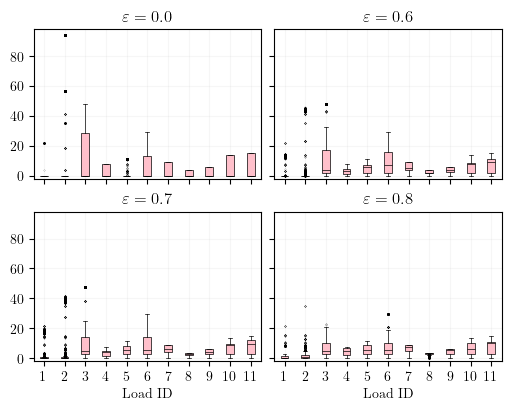

In [32]:
# Plot load shed spreads weighted vs weighted-constraint fairness
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
ticks = list(np.linspace(1, 5, 11))
fig, ax1 = plt.subplots(2, 2,constrained_layout=True)

ax = [ax1[0, 0], ax1[0, 1], ax1[1, 0], ax1[1, 1]]

bplot = ax[0].boxplot(get_bp_load_sheds('dc-opf-ls-MinSum-w.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[0].set_xticklabels([])
ax[0].set_xticks(ticks)
ax[0].set_yticks([0, 20, 40, 60, 80])
ax[0].set_xlim([0.8, 5.2])
ax[0].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[0].grid(alpha=0.1)
ax[0].set_title(r'$\varepsilon=0.0$')


bplot = ax[1].boxplot(get_bp_load_sheds('dc-ls-cons-60-w.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_yticks([0, 20, 40, 60, 80])
ax[1].set_xticks(ticks)
ax[1].set_xlim([0.8, 5.2])
ax[1].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[1].grid(alpha=0.1)
ax[1].set_title(r'$\varepsilon=0.6$')


bplot = ax[2].boxplot(get_bp_load_sheds('dc-ls-cons-70-w.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[2].set_xticklabels(labels)
ax[2].set_yticks([0, 20, 40, 60, 80])
ax[2].set_xticks(ticks)
ax[2].set_xlim([0.8, 5.2])
ax[2].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[2].grid(alpha=0.1)
ax[2].set_xlabel('Load ID')
ax[2].set_title(r'$\varepsilon=0.7$')

bplot = ax[3].boxplot(get_bp_load_sheds('dc-ls-cons-80-w.csv'), positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax[3].set_xticklabels(labels)
ax[3].set_yticklabels([])
ax[3].set_yticks([0, 20, 40, 60, 80])
ax[3].set_xticks(ticks)
ax[3].set_xlim([0.8, 5.2])
ax[3].set_ylim([-2, 98])
set_box_color(bplot, 'pink', '-')
ax[3].grid(alpha=0.1)
ax[3].set_xlabel('Load ID')
ax[3].set_title(r'$\varepsilon=0.8$')

fig.set_size_inches(5, 4)
plt.savefig('cons-weighted.pdf', format='pdf')

In [33]:
# Get Gini and Jain Indexes for weighted constraint fairness 
wcons_filenames = ['dc-opf-ls-MinSum-w.csv', 
                   'dc-ls-cons-20-w.csv',
                 'dc-ls-cons-40-w.csv',
                 'dc-ls-cons-60-w.csv',
                 'dc-ls-cons-80-w.csv']

wcons_GI = [get_GI(f) for f in wcons_filenames]
wcons_JI = [get_JI(f) for f in wcons_filenames]

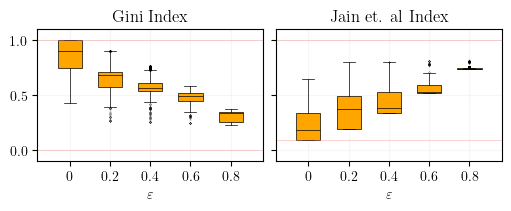

In [34]:
# plot indexes for weighted constraint fairness 
labels = [0, 0.2, 0.4, 0.6, 0.8]
ticks = list(np.linspace(1, 2, 5))
fig, (ax1, ax2) = plt.subplots(1,2,constrained_layout=True)

bplot = ax1.boxplot(wcons_GI, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax1.set_xticklabels(labels)
ax1.set_xticks(ticks)
ax1.set_xlim([0.8, 2.2])
ax1.set_ylim([-0.1, 1.1])
set_box_color(bplot, 'orange', '-')
ax1.axhline(y=0, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax1.axhline(y=1, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax1.grid(alpha=0.1)
ax1.set_xlabel(r'$\varepsilon$')
ax1.set_title('Gini Index')

bplot = ax2.boxplot(wcons_JI, positions=ticks, flierprops={'marker': '.', 'markersize': 0.2, 'markerfacecolor': 'gray', 'alpha': 0.5}, widths=0.15, vert=True, patch_artist=True)
ax2.set_xticklabels(labels)
ax2.set_xticks(ticks)
ax2.set_yticklabels([])
ax2.set_xlim([0.8, 2.2])
ax2.set_ylim([-0.1, 1.1])
set_box_color(bplot, 'orange', '-')
ax2.axhline(y=1/11.0, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax2.axhline(y=1, c='lightcoral', lw=0.5, ls='-', alpha=0.5)
ax2.grid(alpha=0.1)
ax2.set_xlabel(r'$\varepsilon$')
ax2.set_title('Jain et. al Index')

fig.set_size_inches(5, 2)
plt.savefig('cons-weighted-indexes.pdf', format='pdf')

In [43]:
# Showing priority is maintained 
priority_ids = ['1', '2']
case_pairs = [('dc-opf-ls-MinSum.csv', 'dc-opf-ls-MinSum-w.csv'), 
              ('dc-ls-cons-20.csv', 'dc-ls-cons-20-w.csv'),
              ('dc-ls-cons-40.csv', 'dc-ls-cons-40-w.csv'),
              ('dc-ls-cons-60.csv', 'dc-ls-cons-60-w.csv'),
              ('dc-ls-cons-80.csv', 'dc-ls-cons-80-w.csv')]

for (uw_case, w_case) in case_pairs:
    df = get_data(uw_case)[['scenario_id', 'total_shed'] + priority_ids].rename(
        columns={'total_shed': 'ls-ref'})
    df['ref-sum'] = df['1'] + df['2']
    df['ref'] = df['ref-sum'].div(df['ls-ref'], axis=0)
    df.drop(priority_ids, axis=1, inplace=True)
    wdf = get_data(w_case)[['scenario_id', 'total_shed'] + priority_ids].rename(
        columns={'total_shed': 'ls-w'})
    wdf['w-sum'] = wdf['1'] + wdf['2']
    wdf['w'] = wdf['w-sum'].div(wdf['ls-w'], axis=0)
    df = df.join(wdf.set_index('scenario_id'), on='scenario_id')
    df['diff'] = df['ref'] - df['w']
    # print('mean diff: {:.5f}, max diff: {:.5f}'.format(np.mean(df['diff'].tolist()), np.max(df['diff'].tolist())))
    print('{} -- mean rel. shed: {:.4f} max. rel shed: {:.2f}; {} -- mean rel. shed: {:.4f} max. rel shed: {:.2f}'.format(
        uw_case, np.mean(df['ref'].tolist())*100, np.max(df['ref'].tolist())*100, 
        w_case, np.mean(wdf['w'].tolist())*100, np.max(wdf['w'].tolist())*100
    ))

dc-opf-ls-MinSum.csv -- mean rel. shed: 15.7690 max. rel shed: 100.00; dc-opf-ls-MinSum-w.csv -- mean rel. shed: 9.7905 max. rel shed: 100.00
dc-ls-cons-20.csv -- mean rel. shed: 22.6012 max. rel shed: 79.03; dc-ls-cons-20-w.csv -- mean rel. shed: 7.4103 max. rel shed: 79.03
dc-ls-cons-40.csv -- mean rel. shed: 21.3227 max. rel shed: 70.09; dc-ls-cons-40-w.csv -- mean rel. shed: 6.0031 max. rel shed: 70.09
dc-ls-cons-60.csv -- mean rel. shed: 17.9113 max. rel shed: 53.39; dc-ls-cons-60-w.csv -- mean rel. shed: 2.4535 max. rel shed: 53.39
dc-ls-cons-80.csv -- mean rel. shed: 16.9572 max. rel shed: 36.77; dc-ls-cons-80-w.csv -- mean rel. shed: 4.7140 max. rel shed: 36.77
